import the library


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data collection and pre-processing

In [17]:
# loading the data from csv file to panda datadra,e
df = pd.read_csv("/content/mail_data.csv")

In [18]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [19]:
#replace the null values with null string
mail_data = df.where((pd.notnull(df)),'')

In [20]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#checking the number of rows and  columns in data frame
mail_data.shape

(5572, 2)

In [22]:
#label spam mail as 0 and ham mail as 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

spam=0

ham=1

In [23]:
mail_data['Category'] = encoder.fit_transform(mail_data['Category'])

In [24]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
#missing value
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [26]:
#check for duplicate values
mail_data.duplicated().sum()

415

In [27]:
#remove duplicates
df = mail_data.drop_duplicates(keep = 'first')

In [28]:
df.duplicated().sum()


0

In [29]:
df.shape

(5157, 2)

EDA

In [30]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

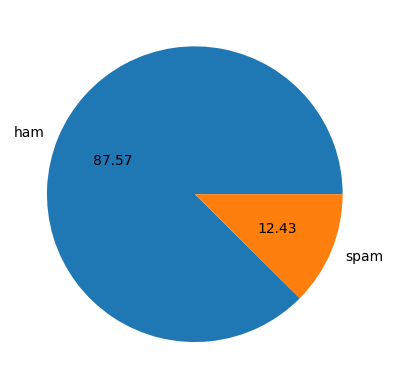

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [33]:
#data is imbalanced


In [34]:
import nltk
!pip install nltk

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['num_characters']=df['Message'].apply(len)

<ipython-input-36-93ea61aafa0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Message'].apply(len)


In [37]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
# number of words
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-38-1d877af7ed04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [39]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-40-70aa1a015c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [41]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
# this is for ham message
df[df['Category'] ==0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
#this is spam for spam
df[df['Category'] ==1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [45]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

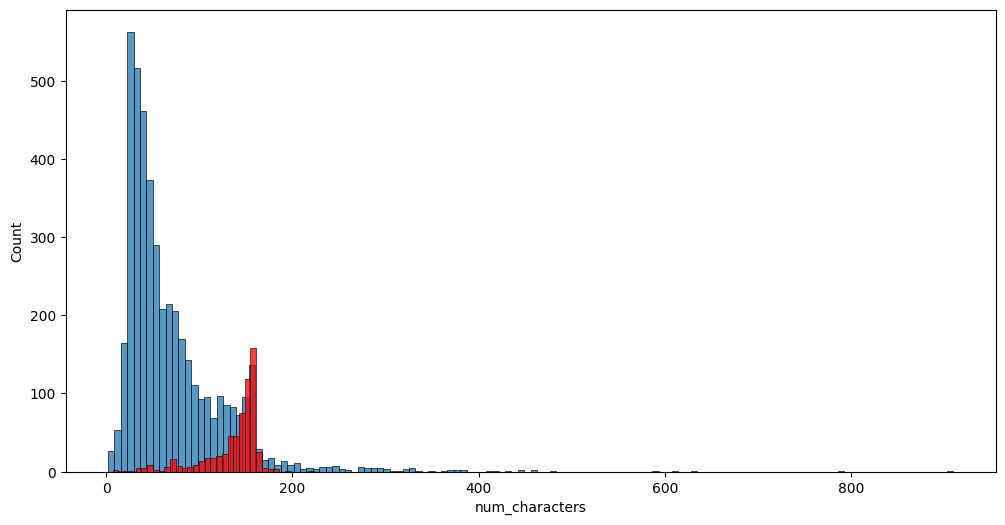

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']== 0] ['num_characters'])
sns.histplot(df[df['Category']== 1] ['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

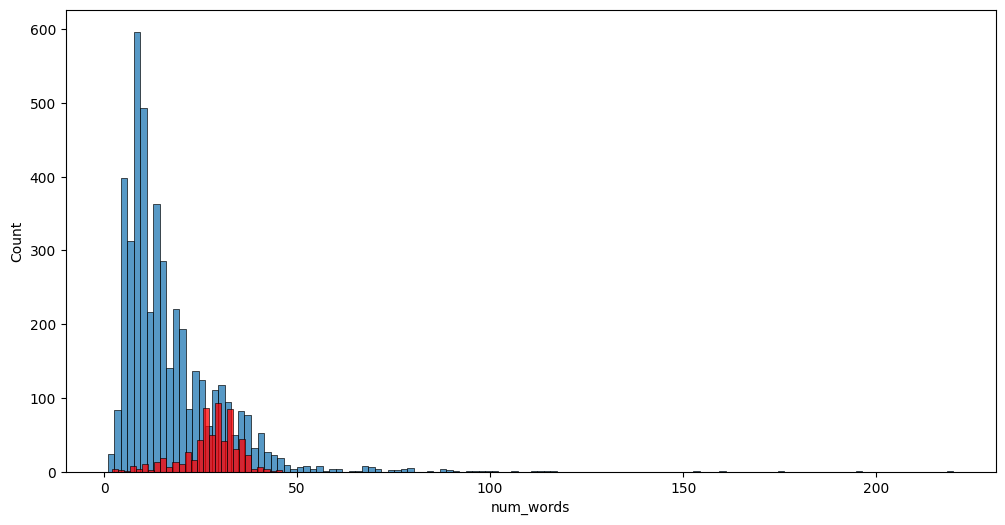

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']== 0] ['num_words'])
sns.histplot(df[df['Category']== 1] ['num_words'],color='red')

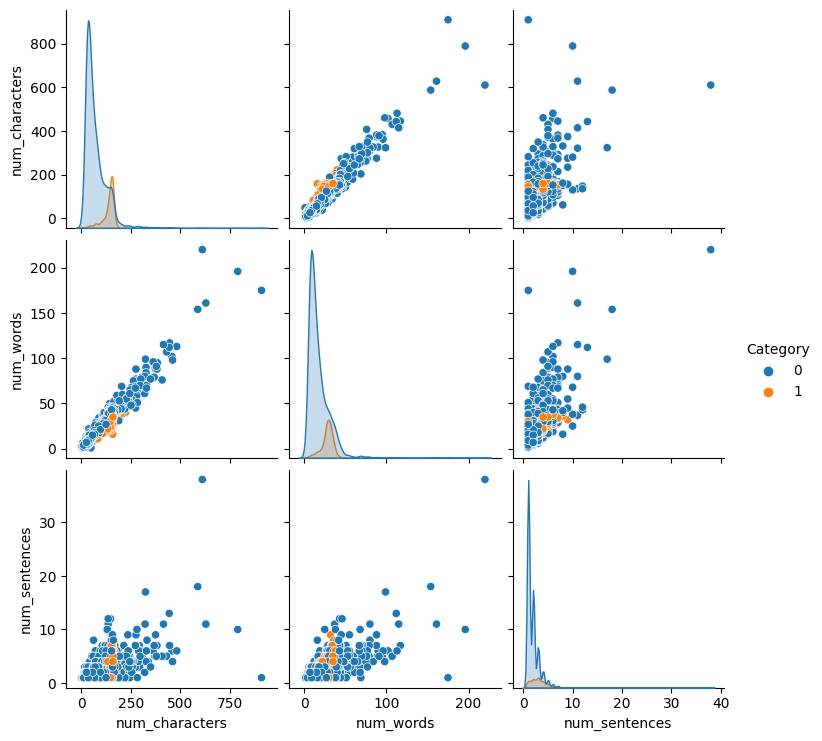

In [48]:
sns.pairplot(df,hue='Category')

<ipython-input-49-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

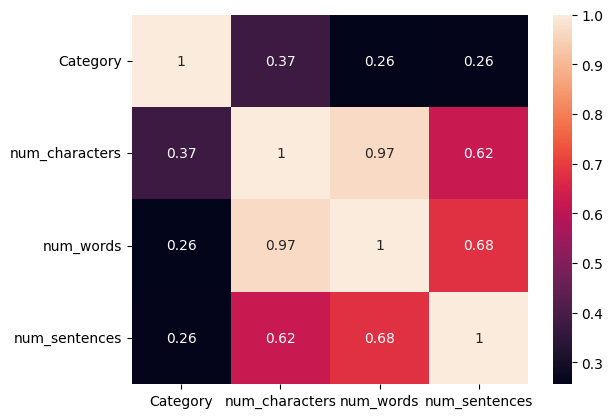

In [49]:
sns.heatmap(df.corr(),annot=True)

### **Data preprocessing**


*   lower case
*   tokenization
*   removing special charcter
*   removing stop words and punctuation
*   stemming







In [57]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

    text=y[:] #list is mutable so it has to cloning
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

  return  " " .join(y)


In [58]:
  >>> import nltk
  >>> nltk.download('stopwords')
  >>> nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
transform_text("i loved the yt lectures on machine learning. how about you?")

'love yt lectur machin learn'

In [61]:
#from nltk.corpus import stopwords
#stopwords.words('english')


In [62]:
#import string
#string.punctuation

In [55]:
df['Message'][1000]

'Aight will do, thanks again for comin out'

In [63]:
#from nltk.stem.porter import PorterStemmer
#ps = PorterStemmer()
#ps.stem('dancing')


In [66]:
 df['transformed_text'] = df['Message'].apply(transform_text)

<ipython-input-66-d5aface31b87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['Message'].apply(transform_text)


In [67]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


word cloud


In [72]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [73]:
spam_wc= wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))

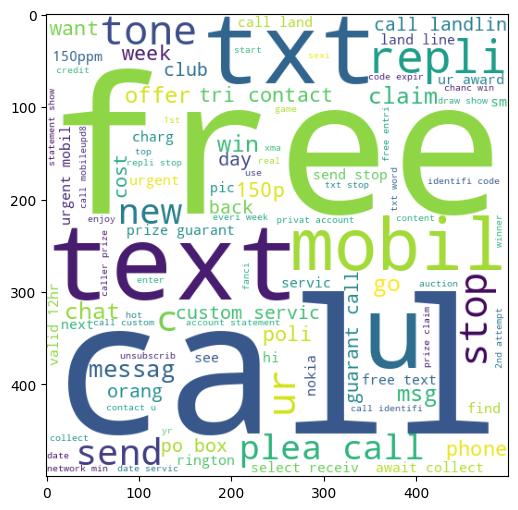

In [75]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [76]:
ham_wc= wc.generate(df[df['Category'] == 0]['transformed_text'].str.cat(sep=" "))

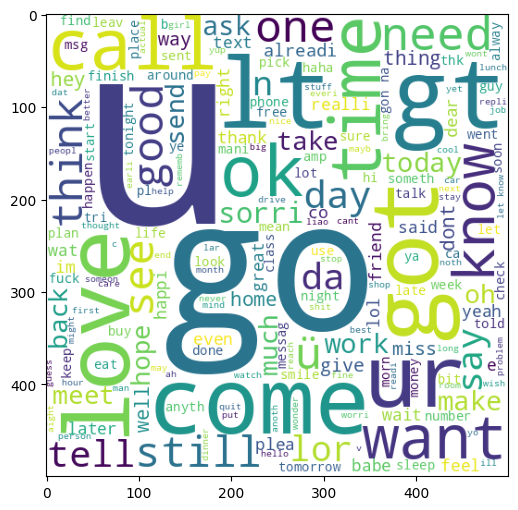

In [77]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [78]:
#top 30 words of spam and ham


In [79]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [81]:
spam_corpus = []
for msg in df[df['Category'] ==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [82]:
len(spam_corpus)

9772

In [92]:
ham_corpus = []
for msg in df[df['Category'] ==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [93]:
len(ham_corpus)

35831

**model building**

In [138]:
#naive bayes algo
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv =CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [139]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [140]:
x.shape

(5157, 6745)

In [141]:
y = df['Category'].values

In [142]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [145]:
from  sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [146]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [147]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8711240310077519
[[789 116]
 [ 17 110]]
0.48672566371681414


In [148]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [149]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [ ]:
#tfidf -->mnb

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [151]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [152]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [155]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [156]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9709302325581395, 0.970873786407767)

In [157]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9709302325581395
Precision -  0.970873786407767
For  KN
Accuracy -  0.9040697674418605
Precision -  1.0
For  NB
Accuracy -  0.9612403100775194
Precision -  1.0
For  DT
Accuracy -  0.935077519379845
Precision -  0.8191489361702128
For  LR
Accuracy -  0.9525193798449613
Precision -  0.9239130434782609
For  RF
Accuracy -  0.9660852713178295
Precision -  1.0
For  AdaBoost
Accuracy -  0.9583333333333334
Precision -  0.9468085106382979
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8990825688073395
For  ETC
Accuracy -  0.9718992248062015
Precision -  0.99
For  GBDT
Accuracy -  0.9496124031007752
Precision -  0.9411764705882353
For  xgb
Accuracy -  0.9689922480620154
Precision -  0.9523809523809523


In [159]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904070,1.000000
2,NB,0.961240,1.000000
5,RF,0.966085,1.000000
8,ETC,0.971899,0.990000
0,SVC,0.970930,0.970874
10,xgb,0.968992,0.952381
6,AdaBoost,0.958333,0.946809
9,GBDT,0.949612,0.941176
4,LR,0.952519,0.923913
7,BgC,0.961240,0.899083


In [160]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904070
1,NB,Accuracy,0.961240
2,RF,Accuracy,0.966085
3,ETC,Accuracy,0.971899
4,SVC,Accuracy,0.970930
5,xgb,Accuracy,0.968992
6,AdaBoost,Accuracy,0.958333
7,GBDT,Accuracy,0.949612
8,LR,Accuracy,0.952519
9,BgC,Accuracy,0.961240


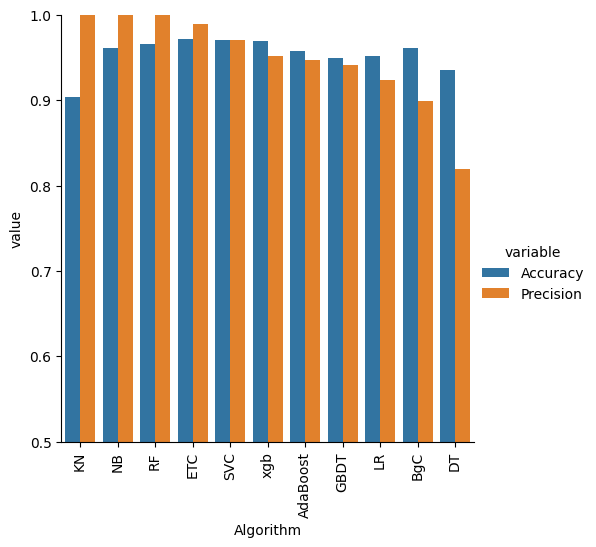

In [161]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [165]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [166]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [167]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [168]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [169]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [170]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904070,1.000000,0.904070,1.000000,0.904070,1.000000,0.904070,1.000000
1,NB,0.961240,1.000000,0.961240,1.000000,0.961240,1.000000,0.961240,1.000000
2,RF,0.966085,1.000000,0.966085,1.000000,0.966085,1.000000,0.966085,1.000000
3,ETC,0.971899,0.990000,0.971899,0.990000,0.971899,0.990000,0.971899,0.990000
4,SVC,0.970930,0.970874,0.970930,0.970874,0.970930,0.970874,0.970930,0.970874
5,xgb,0.968992,0.952381,0.968992,0.952381,0.968992,0.952381,0.968992,0.952381
6,AdaBoost,0.958333,0.946809,0.958333,0.946809,0.958333,0.946809,0.958333,0.946809
7,GBDT,0.949612,0.941176,0.949612,0.941176,0.949612,0.941176,0.949612,0.941176
8,LR,0.952519,0.923913,0.952519,0.923913,0.952519,0.923913,0.952519,0.923913
9,BgC,0.961240,0.899083,0.961240,0.899083,0.961240,0.899083,0.961240,0.899083


In [171]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [172]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [174]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [175]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9767441860465116
Precision 1.0


In [176]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [177]:
from sklearn.ensemble import StackingClassifier

In [178]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [182]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9786821705426356
Precision 0.9565217391304348


In [183]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))